# Parte 1: Introducción a Python
- Ejercicio breve: Escribir un programa que reciba una lista de números enteros y determine la cantidad de números pares e impares.

In [1]:
def contar_pares_impares(lista):
    pares = sum(1 for n in lista if n % 2 == 0)
    impares = len(lista) - pares
    print(f"Números pares: {pares}")
    print(f"Números impares: {impares}")

numeros = [10, 21, 32, 43, 54, 65, 76, 87, 98, 109]
contar_pares_impares(numeros)

Números pares: 5
Números impares: 5


# Parte 2: Manipulación de datos con Pandas y NumPy
- Carga y exploración inicial de datos:
>  Importar el archivo CSV que se entrega en el laboratorio.
>  Explorar datos con funciones como .head(), .info(), y .describe().
- Transformación de datos:
>  Crear una nueva columna llamada “Ingresos Totales”.
> Filtrar datos según una condición (Filtrar aquellos productos de los que se hay vendido
más de 40 unidades).
> Filtrar los 10 precios más altos.

In [6]:
import pandas as pd

ventas = pd.read_csv("ventas_productos.csv")
# Mostrar información básica
print(f"Dimensiones del dataset: {ventas.shape}")
print(ventas.head())
 
print("Información del dataset")
print(ventas.info())
 
print("Variables estadisticas básicas")
print(ventas.describe())
 
ventas['Ingresos Totales'] = ventas['Precio Unitario'] * ventas['Cantidad Vendida']
 
# Filtrar productos vendidos en más de 40 unidades
productos_mas_de_40 = ventas[ventas['Cantidad Vendida'] > 40]
print("\nProductos con más de 40 unidades vendidas:")
print(productos_mas_de_40)
 
# Filtrar los 10 precios unitarios más altos
top_10_precios = ventas.nlargest(10, 'Precio Unitario')
print("\nTop 10 precios unitarios más altos:")
print(top_10_precios)

Dimensiones del dataset: (10, 5)
   Producto  Precio Unitario  Cantidad Vendida Sucursal      Mes
0    Camisa            25000                35    Norte    Enero
1  Pantalón            40000                45      Sur  Febrero
2   Zapatos           120000                20   Centro    Enero
3  Sombrero            20000                50    Norte  Febrero
4     Bolso            50000                42      Sur    Enero
Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Producto          10 non-null     object
 1   Precio Unitario   10 non-null     int64 
 2   Cantidad Vendida  10 non-null     int64 
 3   Sucursal          10 non-null     object
 4   Mes               10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes
None
Variables estadisticas básicas
       Precio Unitario  Cantidad Vendid

# Parte 3: Visualización de datos con Matplotlib y Seaborn
> Gráficos básicos con Matplotlib:

• Crear un gráfico de barras que agrupe las ventas por sucursal y mes, y sume las cantidades vendidas.
• Crear un gráfico de dispersión para mostrar la relación entre las columnas “Precio Unitario” y “Cantidad Vendida”.

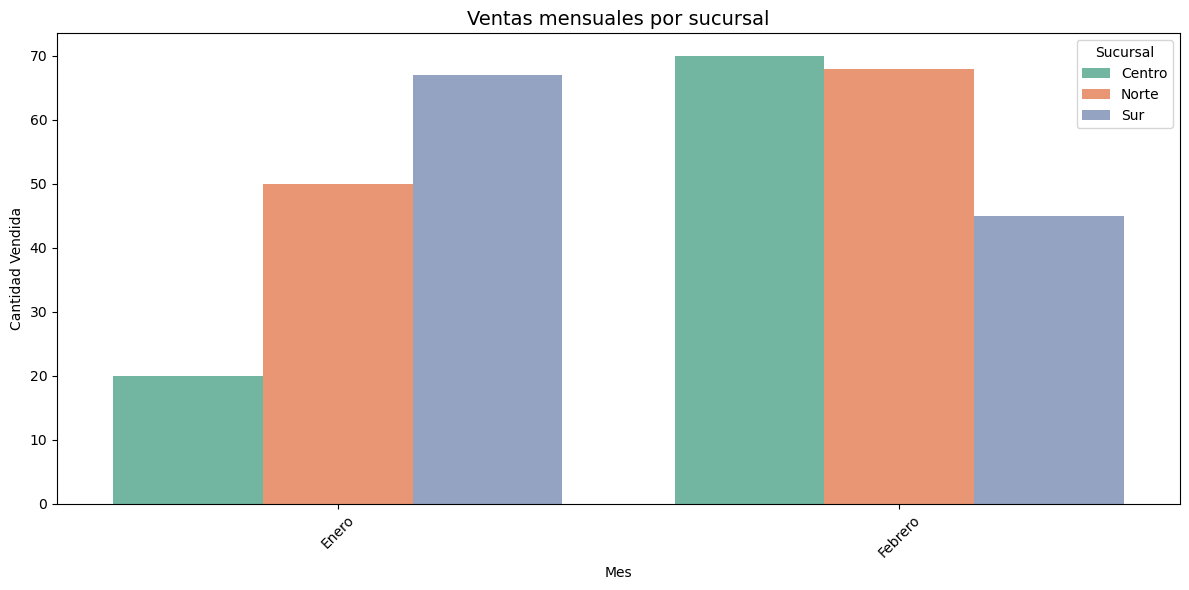

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las columnas numéricas sean del tipo correcto
df["Precio Unitario"] = pd.to_numeric(df["Precio Unitario"], errors="coerce")
df["Cantidad Vendida"] = pd.to_numeric(df["Cantidad Vendida"], errors="coerce")

# Agrupar ventas por sucursal y mes
ventas_agrupadas = df.groupby(["Sucursal", "Mes"])["Cantidad Vendida"].sum().reset_index()

# Orden cronológico de los meses
orden_meses = ["Enero", "Febrero"]

ventas_agrupadas["Mes"] = pd.Categorical(ventas_agrupadas["Mes"], categories=orden_meses, ordered=True)
ventas_agrupadas.sort_values("Mes", inplace=True)

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_agrupadas, x="Mes", y="Cantidad Vendida", hue="Sucursal", palette="Set2")
plt.title("Ventas mensuales por sucursal", fontsize=14)
plt.ylabel("Cantidad Vendida")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Parte 4: Integración y Conclusión
- Realizar un pequeño análisis exploratorio  
- Redactar una conclusión breve sobre los hallazgos.

## Explorando un poco los datos
Al revisar los datos, encontramos información de solo dos meses (enero y febrero), y los productos vendidos en cada mes son distintos. Esto hace que sea difícil identificar una tendencia clara o una preferencia de los clientes por ciertos productos.

Aunque visualizamos la relación entre el precio unitario y la cantidad vendida, no se puede concluir mucho sobre el comportamiento de compra, ya que no hay repetición de productos ni suficientes registros para detectar patrones reales.

## ¿Qué nos deja este ejercicio?
Más allá de los resultados, este ejercicio fue valioso porque nos permitió aprender cómo usar Python y bibliotecas como Pandas, Matplotlib y Seaborn para analizar datos reales. Vimos cómo limpiar datos, agrupar información, hacer gráficas personalizadas y sacar observaciones con sentido crítico.

Es un primer paso para desarrollar análisis más completos en el futuro, cuando contemos con bases de datos más robustas y continuas en el tiempo.